In [1]:
import os
import pandas as pd
import numpy as np

# Defines dataset directory
dataset_directory = "dataset"
raw_dataset_directory = os.path.join(dataset_directory, "DATA01/01")

# Processes raw dataset txt files into a singular, combined CSV

In [28]:
# Initialize a sanity dataframe and empty list
all_dfs = []
sanity_df = pd.read_csv(os.path.join(raw_dataset_directory, "01013500_05_model_output.txt"), sep='\s+')

# There are multiple models for each location. For now just process for one
target_model_type = "05"

# Iterates over every file in the raw dataset directory
for file_name in os.listdir(raw_dataset_directory):
    location_id = file_name.split('_')[0]
    model_type = file_name.split('_')[1]

    # Skip over file if it is not of the targetted model type
    if target_model_type != model_type:
        continue

    if file_name.endswith("_model_output.txt"):
        current_df = pd.read_csv(os.path.join(raw_dataset_directory, file_name), sep='\s+')

        # Print a warning as to keep track of any instances of date misalignments in the future
        if current_df.shape != sanity_df.shape:
            print(f"Warning, {file_name} has the shape of {current_df.shape}")
            print(f"when it should have a shape of {sanity_df.shape}\n")

            # If there aren't the same number of columns, error out
            assert (current_df.shape[1] == sanity_df.shape[1])

        # Adds a location ID column and appends the dataframe to a list to be combined later
        current_df["locationID"] = location_id
        all_dfs.append(current_df)


# Combines all the individual dataframes together
combined_df = pd.concat(all_dfs, ignore_index=True)
print(f"Number of Unique Locations: {len(all_dfs)}\n")
total_memory_usage = combined_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nTotal memory usage for the DataFrame: {total_memory_usage:.2f} MB")

# Saves into a new csv
combined_df.to_csv(os.path.join(dataset_directory, f"combined_data_{target_model_type}.csv"), index=False)

print(combined_df.shape)
combined_df.head()

Warning, 01195100_05_model_output.txt has the shape of (11780, 12)
when it should have a shape of (12510, 12)

Number of Unique Locations: 27


Total memory usage for the DataFrame: 51.75 MB
(337040, 13)


,YR,MNTH,DY,HR,SWE,PRCP,RAIM,TAIR,PET,ET,MOD_RUN,OBS_RUN,locationID
0,1980,10,1,12,0.0,3.10,3.10,6.080,1.0883,1.0828,0.0216,0.5510,01013500
1,1980,10,2,12,0.0,4.24,4.24,10.530,1.2687,1.2624,0.0845,0.5607,01013500
2,1980,10,3,12,0.0,8.02,8.02,11.835,1.1867,1.1807,0.1802,0.5586,01013500
3,1980,10,4,12,0.0,15.27,15.27,7.380,1.0033,0.9983,0.4370,0.6712,01013500
4,1980,10,5,12,0.0,8.48,8.48,4.800,0.8536,0.8493,0.7372,0.8216,01013500


# Import the dataset and select desired attributes

In [2]:
# Read in the combined CSV
combined_df = pd.read_csv(os.path.join(dataset_directory, "combined_data_05.csv"))
print(combined_df.shape)
combined_df.head(10)

(337040, 13)


,YR,MNTH,DY,HR,SWE,PRCP,RAIM,TAIR,PET,ET,MOD_RUN,OBS_RUN,locationID
0,1980,10,1,12,0.0,3.10,3.10,6.080,1.0883,1.0828,0.0216,0.5510,1013500
1,1980,10,2,12,0.0,4.24,4.24,10.530,1.2687,1.2624,0.0845,0.5607,1013500
2,1980,10,3,12,0.0,8.02,8.02,11.835,1.1867,1.1807,0.1802,0.5586,1013500
3,1980,10,4,12,0.0,15.27,15.27,7.380,1.0033,0.9983,0.4370,0.6712,1013500
4,1980,10,5,12,0.0,8.48,8.48,4.800,0.8536,0.8493,0.7372,0.8216,1013500
5,1980,10,6,12,0.0,0.00,0.00,5.410,0.8797,0.8753,0.9092,0.8671,1013500
6,1980,10,7,12,0.0,0.00,0.00,6.405,0.9653,0.9567,0.9749,0.9115,1013500
7,1980,10,8,12,0.0,2.10,2.10,7.675,1.0825,1.0691,1.0028,0.9483,1013500
8,1980,10,9,12,0.0,3.55,3.55,5.480,0.9270,0.9211,1.0104,0.9634,1013500
9,1980,10,10,12,0.0,0.00,0.00,3.670,0.9403,0.9356,1.0272,0.9504,1013500


In [3]:
# Combines the date columns into one
combined_df["date"] = pd.to_datetime(combined_df[["YR", "MNTH", "DY"]].astype(str).agg('-'.join, axis=1), format="%Y-%m-%d")
combined_df = combined_df.drop(["YR", "MNTH", "DY", "HR"], axis=1)

# Drops columns that we do not want
combined_df = combined_df.drop(["SWE", "RAIM", "TAIR", "PET", "ET", "MOD_RUN"], axis=1)

print(combined_df.shape)
combined_df.head(10)

(337040, 4)


,PRCP,OBS_RUN,locationID,date
0,3.10,0.5510,1013500,1980-10-01
1,4.24,0.5607,1013500,1980-10-02
2,8.02,0.5586,1013500,1980-10-03
3,15.27,0.6712,1013500,1980-10-04
4,8.48,0.8216,1013500,1980-10-05
5,0.00,0.8671,1013500,1980-10-06
6,0.00,0.9115,1013500,1980-10-07
7,2.10,0.9483,1013500,1980-10-08
8,3.55,0.9634,1013500,1980-10-09
9,0.00,0.9504,1013500,1980-10-10


# Augment the entries with a rolling window

Note: timeshift parameter is inclusive, meaning a timeshift of 7 means it will consider 7 days in the past, including the current day.
Meaning a timeshift of 7 would actually be a window of size 8.

In [5]:
from tsfresh.utilities.dataframe_functions import roll_time_series

# Generates rolling window 
window_size = 7 - 1
rolling_df = roll_time_series(combined_df, column_id="locationID", column_sort="date", max_timeshift=window_size, min_timeshift=window_size)

print(rolling_df.shape)
total_memory_usage = rolling_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nTotal memory usage for the DataFrame: {total_memory_usage:.2f} MB")
rolling_df.head(10)

Rolling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:05<00:00,  1.32s/it]


(2358146, 5)

Total memory usage for the DataFrame: 233.89 MB


,PRCP,OBS_RUN,locationID,date,id
47439,3.10,0.5510,1013500,1980-10-01,"(1013500, 1980-10-07 00:00:00)"
47440,4.24,0.5607,1013500,1980-10-02,"(1013500, 1980-10-07 00:00:00)"
47441,8.02,0.5586,1013500,1980-10-03,"(1013500, 1980-10-07 00:00:00)"
47442,15.27,0.6712,1013500,1980-10-04,"(1013500, 1980-10-07 00:00:00)"
47443,8.48,0.8216,1013500,1980-10-05,"(1013500, 1980-10-07 00:00:00)"
47444,0.00,0.8671,1013500,1980-10-06,"(1013500, 1980-10-07 00:00:00)"
47445,0.00,0.9115,1013500,1980-10-07,"(1013500, 1980-10-07 00:00:00)"
47628,4.24,0.5607,1013500,1980-10-02,"(1013500, 1980-10-08 00:00:00)"
47629,8.02,0.5586,1013500,1980-10-03,"(1013500, 1980-10-08 00:00:00)"
47630,15.27,0.6712,1013500,1980-10-04,"(1013500, 1980-10-08 00:00:00)"


# Extract features from the sliding window

Using the TSfresh library, we can automatically extract features from the rolling data.

In [7]:
from tsfresh.feature_extraction import extract_features, MinimalFCParameters, EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

# Extracts some features from the rolling window
extracted_features = extract_features(rolling_df.drop("locationID", axis=1), column_id="id", column_sort="date", 
                                      impute_function=impute, default_fc_parameters=MinimalFCParameters(), n_jobs=8)

print(extracted_features.shape)
total_memory_usage = extracted_features.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nTotal memory usage for the DataFrame: {total_memory_usage:.2f} MB")
extracted_features.head(10)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [05:21<00:00,  8.05s/it]


(336878, 20)

Total memory usage for the DataFrame: 52.72 MB


PRCP__sum_values  PRCP__median  PRCP__mean  PRCP__length  \
1013500 1980-10-07             39.11          4.24    5.587143           7.0   
        1980-10-08             38.11          4.24    5.444286           7.0   
        1980-10-09             37.42          3.55    5.345714           7.0   
        1980-10-10             29.40          2.10    4.200000           7.0   
        1980-10-11             24.79          2.10    3.541429           7.0   
        1980-10-12             28.61          2.10    4.087143           7.0   
        1980-10-13             29.78          2.10    4.254286           7.0   
        1980-10-14             30.04          2.10    4.291429           7.0   
        1980-10-15             27.94          1.17    3.991429           7.0   
        1980-10-16             24.39          0.26    3.484286           7.0   

                    PRCP__standard_deviation  PRCP__variance  \
1013500 1980-10-07                  5.049443       25.496878   
        1980-10-08                  5.131271       26.329939   
        1980-10-09                  5.160005       26.625653   
        1980-10-10                  5.326696       28.373686   
        1980-10-11                  4.049100       16.395212   
        1980-10-12                  4.855114       23.572135   
        1980-10-13                  4.730061       22.373482   
        1980-10-14                  4.697417       22.065727   
        1980-10-15                  4.890867       23.920584   
        1980-10-16                  5.090332       25.911482   

                    PRCP__root_mean_square  PRCP__maximum  \
1013500 1980-10-07                7.530806          15.27   
        1980-10-08                7.481322          15.27   
        1980-10-09                7.429826          15.27   
        1980-10-10                6.783339          15.27   
        1980-10-11                5.379306          10.66   
        1980-10-12                6.346406          12.30   
        1980-10-13                6.361794          12.30   
        1980-10-14                6.362553          12.30   
        1980-10-15                6.312851          12.30   
        1980-10-16                6.168608          12.30   

                    PRCP__absolute_maximum  PRCP__minimum  \
1013500 1980-10-07                   15.27            0.0   
        1980-10-08                   15.27            0.0   
        1980-10-09                   15.27            0.0   
        1980-10-10                   15.27            0.0   
        1980-10-11                   10.66            0.0   
        1980-10-12                   12.30            0.0   
        1980-10-13                   12.30            0.0   
        1980-10-14                   12.30            0.0   
        1980-10-15                   12.30            0.0   
        1980-10-16                   12.30            0.0   

                    OBS_RUN__sum_values  OBS_RUN__median  OBS_RUN__mean  \
1013500 1980-10-07               4.9417           0.6712       0.705957   
        1980-10-08               5.3390           0.8216       0.762714   
        1980-10-09               5.7417           0.8671       0.820243   
        1980-10-10               6.1335           0.9115       0.876214   
        1980-10-11               6.4236           0.9483       0.917657   
        1980-10-12               6.6845           0.9504       0.954929   
        1980-10-13               6.9540           0.9613       0.993429   
        1980-10-14               7.1900           0.9634       1.027143   
        1980-10-15               7.3892           1.0825       1.055600   
        1980-10-16               7.5733           1.1366       1.081900   

                    OBS_RUN__length  OBS_RUN__standard_deviation  \
1013500 1980-10-07              7.0                     0.146200   
        1980-10-08              7.0                     0.152029   
        1980-10-09              7.0                     0.14

# Pre-processes dataset for model input

We must delete the very last (most recent) day of each location because we want to predict for the values of the following day.
Since our target values (Y) only go up to the most recent day, the last day in (X) will be missing a target value that corresponds with the
next day.

In [8]:
# Create input value (X) for model

# The index appears to a tuple (locationid, date), so need to process that out
X = extracted_features.reset_index(names=["locationID", "date"])

# Removes the latest day from each locationID
most_recent_datetime = X.groupby("locationID")["date"].idxmax()
X = X.drop(most_recent_datetime)

print(X.shape)
X.head(10)

(336851, 22)


,locationID,date,PRCP__sum_values,PRCP__median,PRCP__mean,PRCP__length,PRCP__standard_deviation,PRCP__variance,PRCP__root_mean_square,PRCP__maximum,...,OBS_RUN__sum_values,OBS_RUN__median,OBS_RUN__mean,OBS_RUN__length,OBS_RUN__standard_deviation,OBS_RUN__variance,OBS_RUN__root_mean_square,OBS_RUN__maximum,OBS_RUN__absolute_maximum,OBS_RUN__minimum
0,1013500,1980-10-07,39.11,4.24,5.587143,7.0,5.049443,25.496878,7.530806,15.27,...,4.9417,0.6712,0.705957,7.0,0.146200,0.021375,0.720937,0.9115,0.9115,0.5510
1,1013500,1980-10-08,38.11,4.24,5.444286,7.0,5.131271,26.329939,7.481322,15.27,...,5.3390,0.8216,0.762714,7.0,0.152029,0.023113,0.777718,0.9483,0.9483,0.5586
2,1013500,1980-10-09,37.42,3.55,5.345714,7.0,5.160005,26.625653,7.429826,15.27,...,5.7417,0.8671,0.820243,7.0,0.140453,0.019727,0.832181,0.9634,0.9634,0.5586
3,1013500,1980-10-10,29.40,2.10,4.200000,7.0,5.326696,28.373686,6.783339,15.27,...,6.1335,0.9115,0.876214,7.0,0.096097,0.009235,0.881468,0.9634,0.9634,0.6712
4,1013500,1980-10-11,24.79,2.10,3.541429,7.0,4.049100,16.395212,5.379306,10.66,...,6.4236,0.9483,0.917657,7.0,0.050468,0.002547,0.919044,0.9634,0.9634,0.8216
5,1013500,1980-10-12,28.61,2.10,4.087143,7.0,4.855114,23.572135,6.346406,12.30,...,6.6845,0.9504,0.954929,7.0,0.061005,0.003722,0.956875,1.0825,1.0825,0.8671
6,1013500,1980-10-13,29.78,2.10,4.254286,7.0,4.730061,22.373482,6.361794,12.30,...,6.9540,0.9613,0.993429,7.0,0.076500,0.005852,0.996370,1.1366,1.1366,0.9115
7,1013500,1980-10-14,30.04,2.10,4.291429,7.0,4.697417,22.065727,6.362553,12.30,...,7.1900,0.9634,1.027143,7.0,0.084545,0.007148,1.030616,1.1475,1.1475,0.9483
8,1013500,1980-10-15,27.94,1.17,3.991429,7.0,4.890867,23.920584,6.312851,12.30,...,7.3892,1.0825,1.055600,7.0,0.086715,0.007519,1.059156,1.1475,1.1475,0.9504
9,1013500,1980-10-16,24.39,0.26,3.484286,7.0,5.090332,25.911482,6.168608,12.30,...,7.5733,1.1366,1.081900,7.0,0.082583,0.006820,1.085047,1.1475,1.1475,0.9504


In [9]:
# Create target value (Y) for model

Y = rolling_df[rolling_df.apply(lambda row: row["id"][0] == row["locationID"] and row["id"][1] == row["date"], axis=1)]

# Renames columns to distinguish target values vs feature values
Y = Y.rename(columns={col: f"TARGET_{col}" for col in Y if col not in ["id", "locationID", "date"]})

print(Y.shape)
Y.head()

(336878, 5)


,TARGET_PRCP,TARGET_OBS_RUN,locationID,date,id
47445,0.00,0.9115,1013500,1980-10-07,"(1013500, 1980-10-07 00:00:00)"
47634,2.10,0.9483,1013500,1980-10-08,"(1013500, 1980-10-08 00:00:00)"
47823,3.55,0.9634,1013500,1980-10-09,"(1013500, 1980-10-09 00:00:00)"
48012,0.00,0.9504,1013500,1980-10-10,"(1013500, 1980-10-10 00:00:00)"
48201,10.66,0.9613,1013500,1980-10-11,"(1013500, 1980-10-11 00:00:00)"


## Create a low dimensional, prepared dataframe/CSV that contains both X and Y for the model.

In [10]:
# Need to shift Y by 1 because it is predicting for the current day, when we want to predict for tomorrow.

# Computes an offset for the correct date alignments
Y.loc[:, "previous_date"] = Y["date"] - pd.Timedelta(days=1)

# Merges X and Y together for an aggregated "prepared" dataset
merged_df = pd.merge(X, Y.drop(["id", "date"], axis=1), how="inner", left_on=["locationID", "date"], right_on=["locationID", "previous_date"])
merged_df = merged_df.drop("previous_date", axis=1)
merged_df = merged_df.reset_index(drop=True)

# Save this prepared dataset so that we don't have to process everything again
merged_df.to_csv(os.path.join(dataset_directory, "prepared_data_05.csv"), index=False)

print(merged_df.shape)
merged_df.head(10)

(336851, 24)


,locationID,date,PRCP__sum_values,PRCP__median,PRCP__mean,PRCP__length,PRCP__standard_deviation,PRCP__variance,PRCP__root_mean_square,PRCP__maximum,...,OBS_RUN__mean,OBS_RUN__length,OBS_RUN__standard_deviation,OBS_RUN__variance,OBS_RUN__root_mean_square,OBS_RUN__maximum,OBS_RUN__absolute_maximum,OBS_RUN__minimum,TARGET_PRCP,TARGET_OBS_RUN
0,1013500,1980-10-07,39.11,4.24,5.587143,7.0,5.049443,25.496878,7.530806,15.27,...,0.705957,7.0,0.146200,0.021375,0.720937,0.9115,0.9115,0.5510,2.10,0.9483
1,1013500,1980-10-08,38.11,4.24,5.444286,7.0,5.131271,26.329939,7.481322,15.27,...,0.762714,7.0,0.152029,0.023113,0.777718,0.9483,0.9483,0.5586,3.55,0.9634
2,1013500,1980-10-09,37.42,3.55,5.345714,7.0,5.160005,26.625653,7.429826,15.27,...,0.820243,7.0,0.140453,0.019727,0.832181,0.9634,0.9634,0.5586,0.00,0.9504
3,1013500,1980-10-10,29.40,2.10,4.200000,7.0,5.326696,28.373686,6.783339,15.27,...,0.876214,7.0,0.096097,0.009235,0.881468,0.9634,0.9634,0.6712,10.66,0.9613
4,1013500,1980-10-11,24.79,2.10,3.541429,7.0,4.049100,16.395212,5.379306,10.66,...,0.917657,7.0,0.050468,0.002547,0.919044,0.9634,0.9634,0.8216,12.30,1.0825
5,1013500,1980-10-12,28.61,2.10,4.087143,7.0,4.855114,23.572135,6.346406,12.30,...,0.954929,7.0,0.061005,0.003722,0.956875,1.0825,1.0825,0.8671,1.17,1.1366
6,1013500,1980-10-13,29.78,2.10,4.254286,7.0,4.730061,22.373482,6.361794,12.30,...,0.993429,7.0,0.076500,0.005852,0.996370,1.1366,1.1366,0.9115,0.26,1.1475
7,1013500,1980-10-14,30.04,2.10,4.291429,7.0,4.697417,22.065727,6.362553,12.30,...,1.027143,7.0,0.084545,0.007148,1.030616,1.1475,1.1475,0.9483,0.00,1.1475
8,1013500,1980-10-15,27.94,1.17,3.991429,7.0,4.890867,23.920584,6.312851,12.30,...,1.055600,7.0,0.086715,0.007519,1.059156,1.1475,1.1475,0.9504,0.00,1.1475
9,1013500,1980-10-16,24.39,0.26,3.484286,7.0,5.090332,25.911482,6.168608,12.30,...,1.081900,7.0,0.082583,0.006820,1.085047,1.1475,1.1475,0.9504,0.01,1.1366


## Create a high dimensional, prepared dataframe/CSV that combines the same timestamp rows for of different locationIDs

The new X input size is =  \[locations(27) x desired_attributes(2) x extracted_features(10)] = \[540 features]

The new Y output size is = \[locations(27) x desired_targets(2)] = \[54 targets]

In [14]:
# Read in the prepared CSV dataset
merged_df = pd.read_csv(os.path.join(dataset_directory, "prepared_data_05.csv"))

new_df = merged_df.pivot(index='date', columns='locationID')

# Reminder: Location 1195100 contains 2 years worth of data less than other locations, therefore we must truncate all other
# locations in order to keep the input size consistent.
new_df = new_df.dropna()
new_df = new_df.reset_index()

# New columns are in tuple form (attribute, locationID), therefore fix that
new_df.columns = [f'{col[0]}.{col[1]}' if col[0] != "date" else "date" for col in new_df.columns]
new_df.to_csv(os.path.join(dataset_directory, "high_dim_data_05.csv"), index=False)

print(new_df.shape)
new_df.head(10)

(11773, 595)


,date,PRCP__sum_values.1013500,PRCP__sum_values.1022500,PRCP__sum_values.1030500,PRCP__sum_values.1031500,PRCP__sum_values.1047000,PRCP__sum_values.1052500,PRCP__sum_values.1054200,PRCP__sum_values.1055000,PRCP__sum_values.1057000,...,TARGET_OBS_RUN.1139800,TARGET_OBS_RUN.1142500,TARGET_OBS_RUN.1144000,TARGET_OBS_RUN.1162500,TARGET_OBS_RUN.1169000,TARGET_OBS_RUN.1170100,TARGET_OBS_RUN.1181000,TARGET_OBS_RUN.1187300,TARGET_OBS_RUN.1195100,TARGET_OBS_RUN.4296000
0,1982-10-07,14.21,2.26,11.57,2.51,2.23,7.07,1.78,2.31,0.00,...,1.3727,0.8676,0.4150,0.3410,0.2655,0.2511,0.3619,0.1520,0.1581,0.9605
1,1982-10-08,13.42,7.64,12.61,11.00,11.80,24.24,33.75,17.00,19.66,...,0.8025,0.7436,1.0341,0.9255,0.6796,0.4337,1.8297,1.4247,0.3328,1.6732
2,1982-10-09,11.90,11.51,13.07,15.78,15.73,26.93,39.73,20.74,27.50,...,0.4857,0.5887,0.7190,1.0230,0.5415,0.4337,1.0355,1.0448,0.3827,1.0535
3,1982-10-10,10.47,11.51,13.12,17.28,18.35,26.93,45.58,24.32,30.00,...,0.3590,0.4028,0.5259,0.7794,0.3716,0.3196,0.5932,0.6648,0.2662,0.6739
4,1982-10-11,10.47,11.50,12.40,17.28,18.35,26.93,45.58,24.32,30.00,...,0.3168,0.3408,0.4136,0.5846,0.4672,0.2967,0.4625,0.4749,0.2496,0.5267
5,1982-10-12,10.46,11.50,12.40,17.28,18.35,26.93,45.58,24.32,30.00,...,0.3062,0.3098,0.3602,0.4774,0.4035,0.2739,0.4122,0.3894,0.2496,0.4648
6,1982-10-13,13.75,11.50,12.74,17.28,18.35,27.05,45.58,24.32,30.00,...,0.3379,0.3098,0.3506,0.4676,0.4141,0.3424,0.4524,0.3942,0.2995,0.4648
7,1982-10-14,19.46,26.31,21.13,23.38,25.52,29.50,48.88,29.67,34.52,...,0.3696,0.3098,0.3684,0.4384,0.4141,0.3424,0.4826,0.3609,0.3161,0.4880
8,1982-10-15,17.36,33.23,18.32,16.46,17.90,14.84,20.38,17.44,14.86,...,0.3590,0.3408,0.4027,0.3653,0.3716,0.3196,0.4222,0.3039,0.2662,0.7901
9,1982-10-16,15.12,30.47,14.21,11.86,14.82,9.48,19.65,14.35,10.45,...,0.3379,0.3408,0.4424,0.3166,0.3292,0.2967,0.3519,0.2564,0.2496,0.9373


# Model Creation (High Dimensional)

In [29]:
# Read in the prepared CSV dataset
merged_df = pd.read_csv(os.path.join(dataset_directory, "high_dim_data_05.csv"))
print(merged_df.shape)

(11773, 595)


In [30]:
# Drop less relevant features
merged_df = merged_df[[col for col in merged_df.columns if "_length" not in col]]
print(merged_df.shape)

(11773, 541)


In [31]:
# Next Step: Test Train Split (No shuffle because each entry is dependent)
dataset = merged_df.set_index("date")
train_data = dataset[dataset.index < "2010"]
test_data = dataset[dataset.index >= "2010"]

# Number of targets
n_targets = dataset.filter(like='TARGET_').shape[1]

# Separate features and targets for training data
X_train = train_data.iloc[:, :-n_targets]
Y_train = train_data.iloc[:, -n_targets:]

# Separate features and targets for testing data
X_test = test_data.iloc[:, :-n_targets]
Y_test = test_data.iloc[:, -n_targets:]

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(9948, 486) (1825, 486) (9948, 54) (1825, 54)


## Train the Gradient Boosting model (High Dimensional)

In [56]:
from xgboost import XGBRegressor

# Define the Gradient Boosting model XGBRegressor
xgb_model = XGBRegressor(n_estimators=1500, learning_rate=0.2, max_depth=10, subsample=0.8, colsample_bytree=0.8, min_child_weight=2, random_state=42, n_jobs=8)

# Train the model
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=8,
             num_parallel_tree=None, random_state=42, ...)

In [47]:
# Save the model
xgb_model.save_model("xgb_model_high_dim.json")

In [52]:
from xgboost import XGBRegressor

# Load the model
xgb_model = XGBRegressor()
xgb_model.load_model("xgb_model_high_dim.json")

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict the target values on the test set
Y_pred = xgb_model.predict(X_test)

# MSE and MAE
print("Aggregated MSE:", mean_squared_error(Y_test, Y_pred))
print("Aggregated MAE:", mean_absolute_error(Y_test, Y_pred))

Aggregated MSE: 39.31557365688972
Aggregated MAE: 3.5285606306496415


## Evaluate and visualize the results of the model (High Dimensional)

In [58]:
# Print evaluations for the two targets
print("Evaluation Metrics for OBS_RUN")
print("MSE:", mean_squared_error(Y_test.iloc[:, 27:], Y_pred[:, 27:]))
print("MAE:", mean_absolute_error(Y_test.iloc[:, 27:], Y_pred[:, 27:]))

print("\nEvaluation Metrics for PRCP")
print("MSE:", mean_squared_error(Y_test.iloc[:, :27], Y_pred[:, :27]))
print("MAE:", mean_absolute_error(Y_test.iloc[:, :27], Y_pred[:, :27]))

Evaluation Metrics for OBS_RUN
MSE: 9.006157285012344
MAE: 1.3005068564980606

Evaluation Metrics for PRCP
MSE: 69.62499002876709
MAE: 5.75661440480122


In [137]:
# List of targets for indexing convenience to visualize results
location_list = [item.split('.')[1] for item in Y_test.columns[:27]]
print(location_list)

['1013500', '1022500', '1030500', '1031500', '1047000', '1052500', '1054200', '1055000', '1057000', '1073000', '1078000', '1118300', '1121000', '1123000', '1134500', '1137500', '1139000', '1139800', '1142500', '1144000', '1162500', '1169000', '1170100', '1181000', '1187300', '1195100', '4296000']


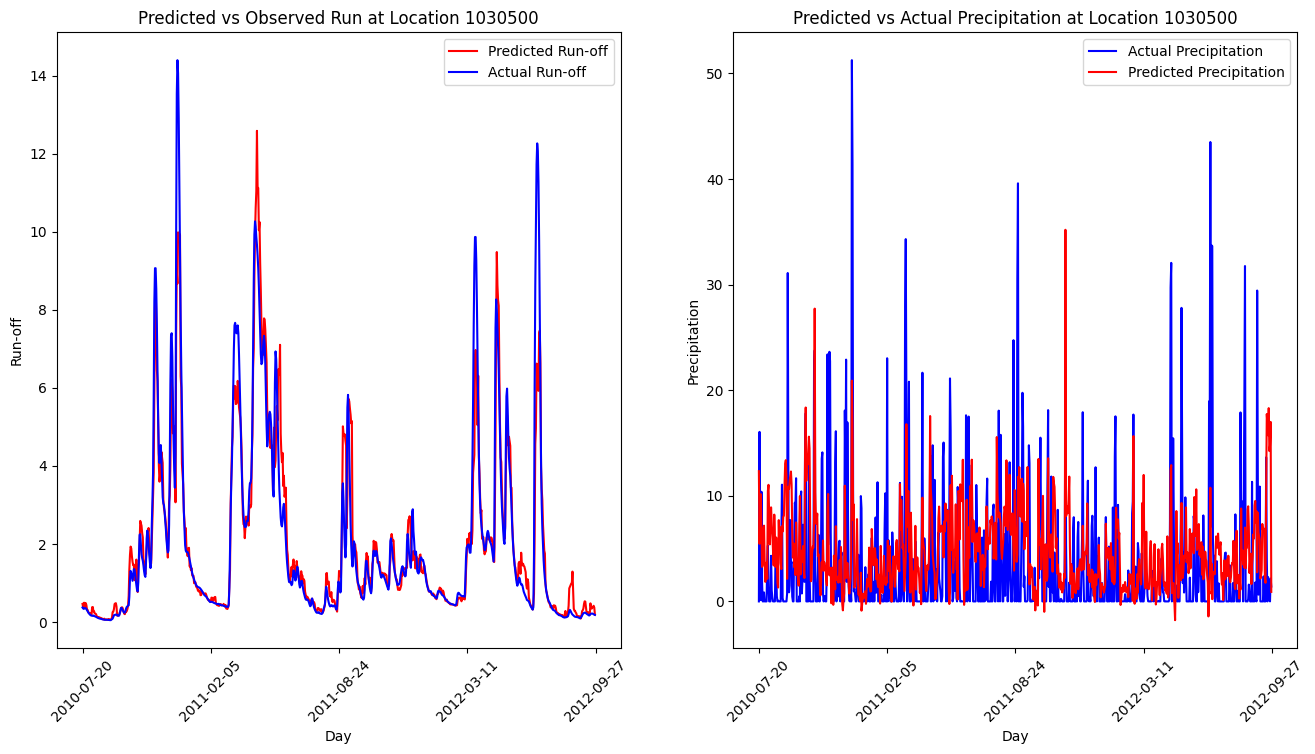

In [59]:
import matplotlib.pyplot as plt

# Defines the frame in which we can plot the predicted/actual values
start = 200
end = 1000

# Defines at which location should be plotted [0-27]
location_list = [item.split('.')[1] for item in Y_test.columns[:27]]
location_index = 2

# Define the plot size
plt.figure(figsize=(16, 8))

# Defines Ticker Date Displays
selected_dates = [ Y_test.index[start], Y_test.index[end], Y_test.index[start + (end-start)//2], 
                  Y_test.index[start + (end-start)//4], Y_test.index[start + 3*(end-start)//4] ]

# Plots the run-off predictions and true values
plt.subplot(1, 2, 1)
plt.plot(Y_test.index[start:end], Y_pred[start:end, 27+location_index], color='red', label="Predicted Run-off")
plt.plot(Y_test.index[start:end], Y_test.iloc[start:end, 27+location_index], color='blue', label="Actual Run-off")
plt.xticks(selected_dates, rotation=45)
plt.xlabel('Day')
plt.ylabel('Run-off')
plt.title(f"Predicted vs Observed Run at Location {location_list[location_index]}")
plt.legend()

# Plots the precipitation predictions and true values
plt.subplot(1, 2, 2)
plt.plot(Y_test.index[start:end], Y_test.iloc[start:end, location_index], color='blue', label="Actual Precipitation")
plt.plot(Y_test.index[start:end], Y_pred[start:end, location_index], color='red', label="Predicted Precipitation")
plt.xticks(selected_dates, rotation=45)
plt.xlabel('Day')
plt.ylabel('Precipitation')
plt.title(f"Predicted vs Actual Precipitation at Location {location_list[location_index]}")
plt.legend()

plt.show()